<a href="https://colab.research.google.com/github/Udhayabas/deeplearning-capston-project/blob/main/object_meesurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# object measurement on **colab**

# New Section

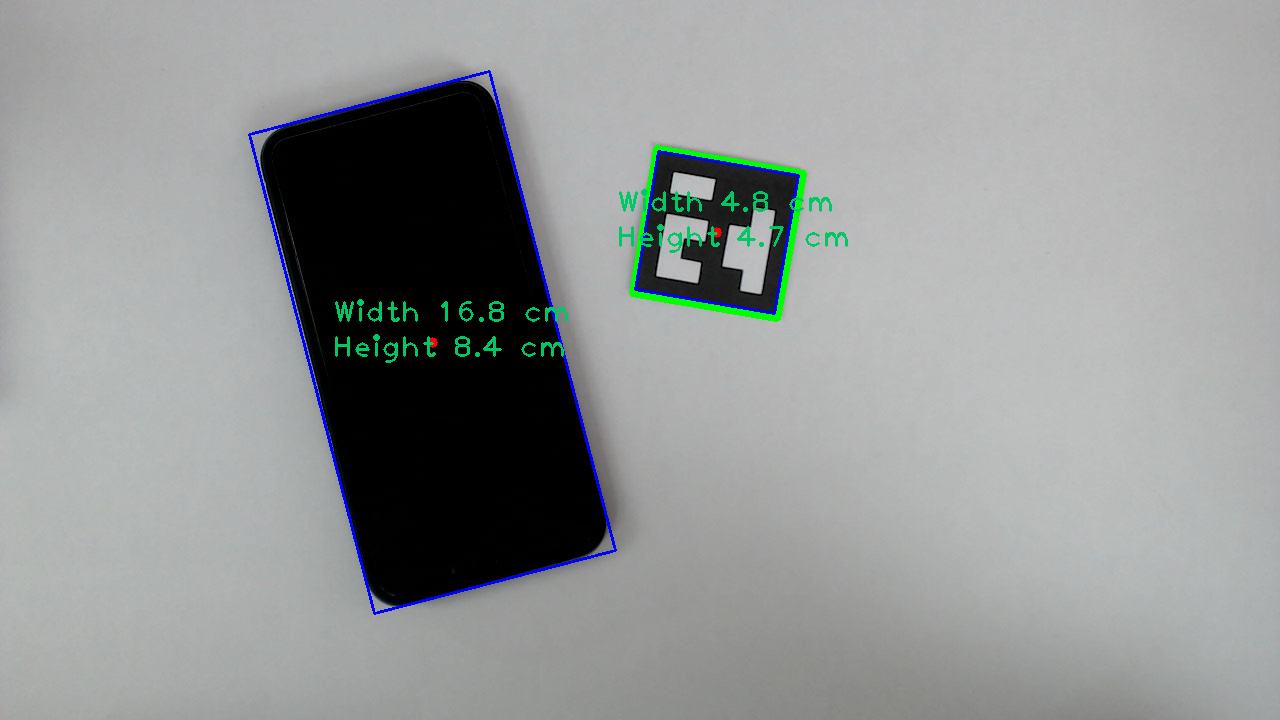

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

class HomogeneousBgDetector:
    def __init__(self):
        pass

    def detect_objects(self, frame):
        # Convert Image to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Create a Mask with adaptive threshold
        mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 19, 5)
        # Find contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        objects_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 2000]
        return objects_contours

# Load Aruco detector parameters
parameters = cv2.aruco.DetectorParameters()

# Set specific parameters if needed (example)
parameters.adaptiveThreshWinSizeMin = 3
parameters.adaptiveThreshWinSizeMax = 23
parameters.adaptiveThreshWinSizeStep = 10

# Load Aruco dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)

# Load Object Detector
detector = HomogeneousBgDetector()

# Load Image
img = cv2.imread("/phone_aruco_marker.jpg")

# Check if the image is loaded properly
if img is None:
    print("Error: Unable to load image.")
else:
    # Get Aruco marker
    corners, ids, _ = cv2.aruco.detectMarkers(img, aruco_dict, parameters=parameters)
    if corners:
        # Draw polygon around the marker
        int_corners = np.intp(corners)
        cv2.polylines(img, int_corners, True, (0, 255, 0), 5)
        # Aruco Perimeter
        aruco_perimeter = cv2.arcLength(corners[0], True)
        # Pixel to cm ratio
        pixel_cm_ratio = aruco_perimeter / 20
        # Detect objects using the custom detector
        contours = detector.detect_objects(img)
        # Draw objects boundaries and measure dimensions
        for cnt in contours:
            # Get minimum area rectangle
            rect = cv2.minAreaRect(cnt)
            (x, y), (w, h), angle = rect
            # Calculate object dimensions in cm using pixel to cm ratio
            object_width = w / pixel_cm_ratio
            object_height = h / pixel_cm_ratio
            # Display rectangle and dimensions
            box = cv2.boxPoints(rect)
            box = np.intp(box)
            cv2.circle(img, (int(x), int(y)), 5, (0, 0, 255), -1)
            cv2.polylines(img, [box], True, (255, 0, 0), 2)
            cv2.putText(img, "Width {} cm".format(round(object_width, 1)), (int(x - 100), int(y - 20)),
                        cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 2)
            cv2.putText(img, "Height {} cm".format(round(object_height, 1)), (int(x - 100), int(y + 15)),
                        cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 2)
        # Display the image
        cv2_imshow(img)
